# Alien Life on Earth – An interesting Analysis using GridDB and Python

## Overview

Most Sci-fi movie enthusiasts are intrigued by the question ‘Do we have alien life on earth?’ In addition to being a sci-fi enthusiast, if you happen to be a data science enthusiast/practitioner, then this blog is for you. Being a data science practitioner myself, I have often wondered if there is any dataset that has details of alien species on earth. I am happy to have found one in the Senckenberg (meta) data portal owned by Senckenberg World of Biodiversity.
As per the Senckenberg (meta) data portal, this dataset is a detailed compilation of alien species around the world, ranging from algae to mammals. Without further ado, let’s dive into the analysis. We will be using GridDB Cloud and Python for this analysis.

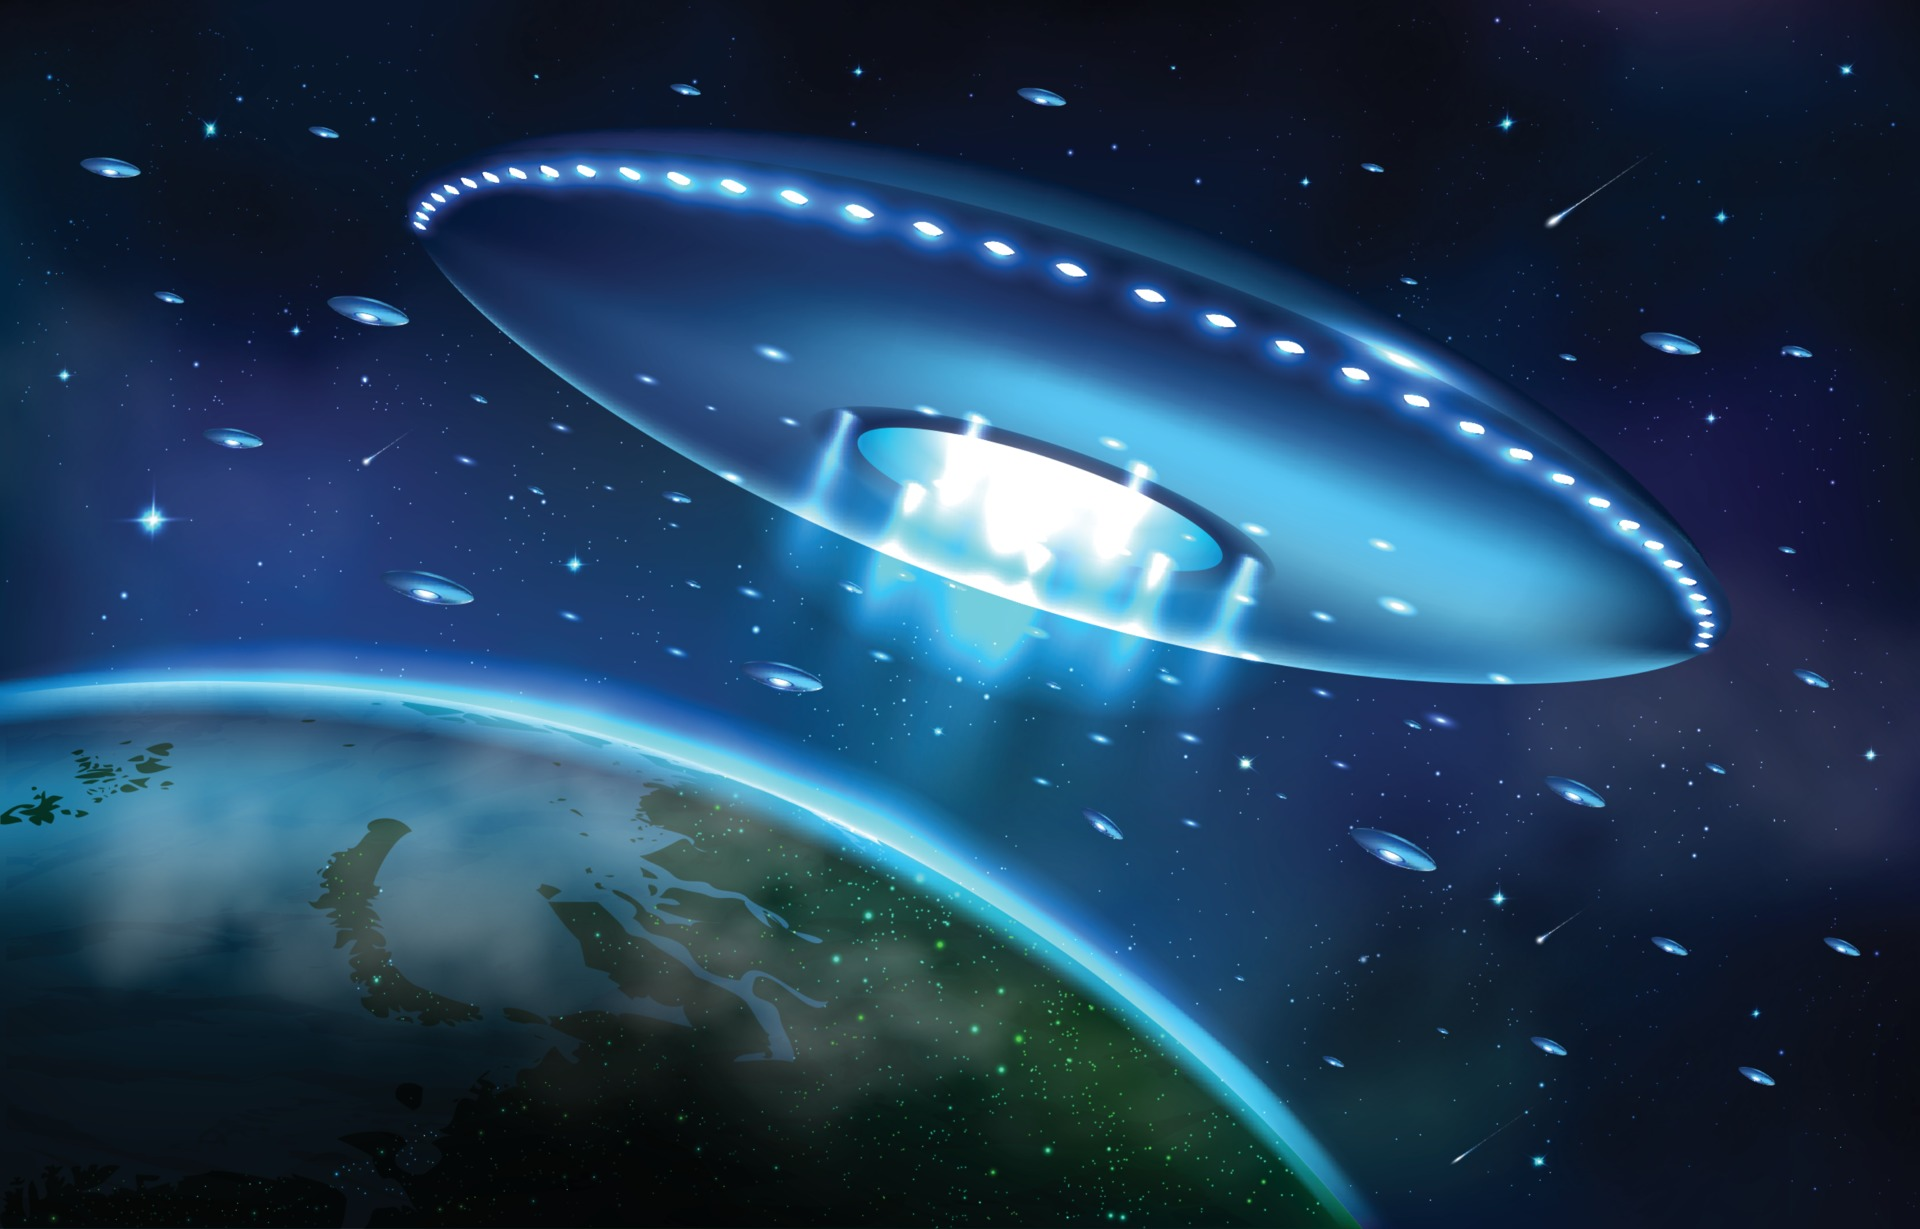
Image Credit: Vecteezy

## Overall Premise

We will be downloading the dataset from Senckenberg (meta) data portal and uploading it to GridDB Cloud using the GridDB WebApi. We will then be harnessing GridDB's SQL capabilities for our analysis in Python. Below is an outline of the approach –

1.  Data Preparation in Python 
2.	Creating a Container structure for use in GridDB
3.  Using GridDB WebApi to set up the Container in GridDB Cloud
4.	Adding data to the container in GridDB
5.  Retrieving data from GridDB cloud
6.  The Analysis Phase - Harnessing the Power of GridDB's SQL Engine

Pre-requisites: 
i.	Getting a GridDB Cloud subscription 
ii.	Creating a Cluster. 
Details for i and ii are available in - https://griddb.net/en/blog/an-introduction-to-griddb-cloud/. 
iii. A python environment (version 3+) and an IDE of your choice.
iv. Dataset to be downloaded from https://dataportal.senckenberg.de/dataset/global-alien-species-first-record-database/resource/bfcc1603-c923-4299-a92a-3168a072d2a4

## Data Preparation in Python

Data Preparation begins with reading the dataset that was downloaded from Senckenberg (meta) data portal. It also includes creating the container structure for the GridDB WebAPI. 

In [ ]:
# Read data from the downloaded dataset
import pandas as pd
Alien_species_global_trends = pd.read_excel("Alien_Species.xlsx", sheet_name=1, header=0,keep_default_na=False, index_col=None)

In [ ]:
# Extracting column headers for the GridDB WebApi Container structure
col_vals = (list(Alien_species_global_trends.columns.values))
col_dtypes = (list(Alien_species_global_trends.dtypes))
data_tuples = list(zip(col_vals,col_dtypes)) # Binding lists to a tuple

# Converting list of tuples to pandas dataframe
container_columns = pd.DataFrame(data_tuples, columns=['col_vals','col_datatypes'])
container_columns.to_csv('container_columns.csv',index=False)

The dataframe thus created will have all the headers and their datatypes. This step is useful when you have a dataset with lots of headers. Note that the GridDB datatypes are different from Python datatypes. As an example, the column 'Bryophytes' is an 'object' in Python which is a 'STRING' in GridDB.
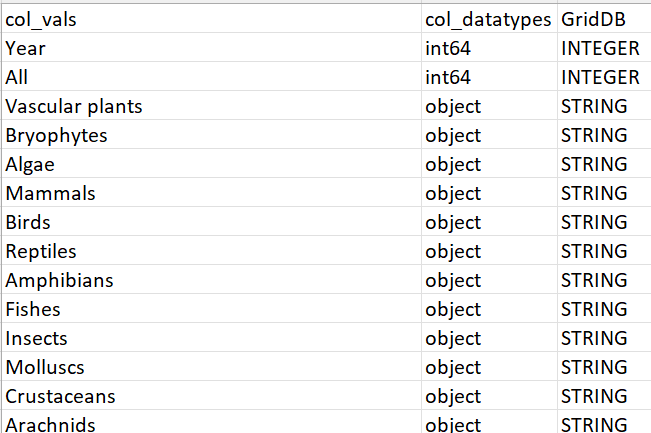

## Creating a Container structure in GridDB using the GridDB WebAPI

As a pre-requisite, please read https://docs.griddb.net/ to know more about containers in GridDB.

The basic structure to create a container in your cluster is as below.  

curl --location --request POST <mark>:GridDBCloudURL/:cluster/dbs/:database/containers/</mark> \
--header 'Authorization: Basic <mark>base encoded version of username:password</mark> \
--header 'Content-Type: application/json; charset=UTF-8' \
--data '{ <br/>
"container_name": <mark>“Container Name"</mark>, <br/>
"container_type": <mark>“Container Type"</mark>, <br/>
"rowkey": true, <br/>
"columns": [ <br/>
{ <br/>
"name": "timestamp", <br/>
"type": "TIMESTAMP" <br/>
}, <br/>
{ <br/>
"name": “HEADER_1", <br/>
"type": "BOOL" <br/>
}, <br/>
{ <br/>
"name": “HEADER_N", <br/>
"type": “INTEGER" <br/>
} <br/>
] <br/>
}' <br/>


Below is a code snippet in Python.

## Using WebApi to set up the Container in GridDB Cloud

In [108]:
import requests  # to make http calls
import http
http.client.HTTPConnection.debuglevel = 1 #Tip - This command enables logging of http calls

In [ ]:
#Construct an object to hold the request headers
header_obj = {"Authorization":"XXX","Content-Type":"application/json; charset=UTF-8","User-Agent":"PostmanRuntime/7.29.0"}

#Construct the base URL based on your GRIDDB cluster you'd like to connect to
base_url = 'https://[host]:[port]/griddb/v2/[clustername]/dbs/[database_name]'

#Construct an object to hold the request body (i.e., the container that needs to be created)
data_obj = {
    "container_name": "Alien_Species_Analysis",
    "container_type": "COLLECTION",
    "rowkey": True,
    "columns": [
    {
    "name": "Year",
    "type": "INTEGER"
    },
    {
    "name": "All",
    "type": "INTEGER"
    },
    {
    "name": "VascularPlants",
    "type": "STRING"
    },
    {
    "name": "Bryophytes",
    "type": "STRING"
    },
    {
    "name": "Algae",
    "type": "STRING"
    },
    {
    "name": "Mammals",
    "type": "STRING"
    },
    {
    "name": "Birds",
    "type": "STRING"
    },
    {
    "name": "Reptiles",
    "type": "STRING"
    },
    {
    "name": "Amphibians",
    "type": "STRING"
    },
    {
    "name": "Fishes",
    "type": "STRING"
    },
    {
    "name": "Insects",
    "type": "STRING"
    },
    {
    "name": "Molluscs",
    "type": "STRING"
    },
    {
    "name": "Crustaceans",
    "type": "STRING"
    },
    {
    "name": "Arachnids",
    "type": "STRING"
    },
    {
    "name": "Arthropods",
    "type": "STRING"
    },
    {
    "name": "Invertebrates",
    "type": "STRING"
    },
    {
    "name": "Fungi",
    "type": "STRING"
    },
    {
    "name": "BacteriaProtozoans",
    "type": "STRING"
    }
    ]
}

#Set up the GridDB WebAPI URL
url = base_url + '/containers'

#Invoke the GridDB WebAPI with the headers and the request body
x = requests.post(url, json = data_obj, headers = header_obj})

## Adding data to the container in GridDB

The next step is to add data in the newly created container ('Alien_Species_Analysis'). GridDB WebAPI provides an API to achieve this. 

The basic structure to create rows in the container is as below.  

curl --location --request PUT <mark>:GridDBCloudURL/:cluster/dbs/:database/containers/:container/rows</mark> \
--header 'Authorization: Basic <mark>base encoded version of username:password</mark> \
--header 'Content-Type: application/json; charset=UTF-8' \
--data '[ <br/>
    [ <br/>
        "Year": "0",  <br/>
        "All": "1503", <br/>
        "Vascular plants": "2", <br/>
        "Bryophytes": "", <br/>
        "Algae": "", <br/>
        "Mammals": "", <br/>
        "Birds": "2", <br/>
        "Reptiles": "", <br/>
        "Amphibians": "", <br/>
        "Fishes": "", <br/>
        "Insects": "", <br/>
        "Molluscs": "", <br/>
        "Crustaceans": "", <br/>
        "Arachnids": "", <br/>
        "Arthropods p.p. (Myriapods, Diplopods etc.)": "", <br/>        "Invertebrates (excl. Arthropods, Molluscs)": "", <br/>
        "Fungi": "", <br/>
        "Bacteria and protozoans": "" <br/>
    ] <br/>
]' <br/>

Please refer 
http://www.toshiba-sol.co.jp/en/pro/griddb/docs-en/v4_3/GridDB_Web_API_Reference.html#%E3%83%AD%E3%82%A6%E7%99%BB%E9%8C%B2 to learn more.

Below is a code snippet in Python.

TIP: Note that the 'to_json' function in pandas is used to convert the data in the dataframe to a json structure.

In [178]:
#Convert the data in the dataframe to the JSON format
Alien_species_global_trends_json = Alien_species_global_trends.to_json(orient='values')
request_body = Alien_species_global_trends_json

In [ ]:
#Setup the URL to be used to invoke the GridDB WebAPI to register rows in the container created previously
url = base_url + '/containers/Alien_Species_Analysis/rows'

#Invoke the GridDB WebAPI using the request constructed
x = requests.put(url, data=request_body, headers=header_obj)

Ensure that you get a response with a status code 200. Below is a snippet of the response message received in our case.

reply: <mark>'HTTP/1.1 200 \r\n'</mark> <br/>
header: Date: Thu, 14 Jul 2022 20:09:04 GMT <br/>
header: Content-Type: application/json;charset=UTF-8 <br/>
header: Transfer-Encoding: chunked <br/>
header: Connection: keep-alive <br/>
header: Server: Apache/2.4.6 (CentOS) <br/>

## The Analysis Phase - Harnessing the Power of GridDB's SQL Engine

It's a known fact that GridDB is a no-sql database that is suited for processes that require highly scalability and performance. However, GridDB also offers a SQL utility for developers who are comfortable with SQL query syntax. The good news is that the SQL utility offered by GridDB is not only easy to use but is also extremely fast in retrieving results. As part of our Analysis, we will be querying the alien species data in GridDB using different SQL statements and will plot the results in Python.  

An example is as below - 
    request_body = '[{"type":"sql-select", "stmt":"select * from Alien_Species_Analysis where Year=2000"}]'
    x = requests.post(url, data=request_body, headers=header_obj)
    
Note that the table name here is the container name that you had created.

### How many alien species have we had across different centuries?

In [ ]:
#Setup the URL to be used to invoke the GridDB WebAPI to retrieve data from the container
url = base_url + '/sql'

#Construct the request body which has the SQL that is to be used to retrieve the data
request_body = '[{"type":"sql-select", "stmt":"SELECT CASE when Year between 1500 and 1599 then 16 when Year between 1600 and 1699 then 17 when Year between 1700 and 1799 then 18 when Year between 1800 and 1899 then 19 when Year between 1900 and 1999 then 20 when Year between 2000 and 2099 then 21 end as Century, sum([All]) as cnt from Alien_Species_Analysis group by 1"}]'

#Invoke the GridDB WebAPI
x = requests.post(url, data=request_body, headers=header_obj)

Tip: My dataset has a column 'All'. In the above query, I've used SUM([All]) enclosed in square brackets. This is because 'All' is a reserved keyword in SQL.

In [280]:
#Process the response received and construct a Pandas dataframe with the data from the response
myJson = x.json()

Alien_spcs_centuries = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])


,Century,cnt
0,16,265
1,17,438
2,18,922
3,19,9270
4,20,30446
5,21,4472


Text(0.5, 1.0, 'How many alien species have we had across different centuries?')

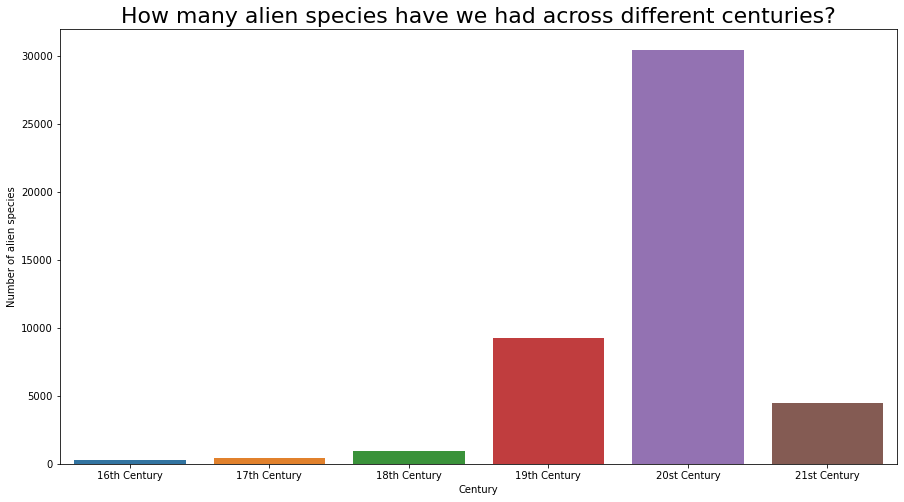

In [410]:
#Plot a barplot using Seaborn

import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Century', y = 'cnt', data = Alien_spcs_centuries)
ax.set_xticklabels(['16th Century', '17th Century', '18th Century', '19th Century', '20st Century', '21st Century'])
ax.set(ylabel='Number of alien species')
ax.set_title ('How many alien species have we had across different centuries?',fontsize=22)

Inference: The most number of alien species were recorded around the 20th century. However, this may also be due to the increased population in the 20th century as well as advanced technology being available compared to earlier centuries. The overall number for the 21st century seems low as only 20 out of the 100 years in the century have elapsed and data is available only for 14 of the 20 elapsed years. Numbers for the 21st century are on track to be higher than the numbers for the 20th century once the 21st century has completely elapsed. 

### What types of alien species have been recorded so far?

Tip: The below query uses type-casting. GRIDDB supports standard SQL type-casting.

In [447]:
#Constuct the SQL query to be used to retrieve the data for each alien type.
sql =("SELECT 'Vascular Plants' AS AlienType, SUM(CASE WHEN LENGTH(VascularPlants)=0 THEN 0 ELSE CAST(VascularPlants AS INTEGER) END) AS Count " 
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Bryophytes', SUM(CASE WHEN LENGTH(Bryophytes)=0 THEN 0 ELSE CAST(Bryophytes AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Algae', SUM(CASE WHEN LENGTH(Algae)=0 THEN 0 ELSE CAST(Algae AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Mammals', SUM(CASE WHEN LENGTH(Mammals)=0 THEN 0 ELSE CAST(Mammals AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Birds', SUM(CASE WHEN LENGTH(Birds)=0 THEN 0 ELSE CAST(Birds AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Reptiles', SUM(CASE WHEN LENGTH(Reptiles)=0 THEN 0 ELSE CAST(Reptiles AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Amphibians', SUM(CASE WHEN LENGTH(Amphibians)=0 THEN 0 ELSE CAST(Amphibians AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Fishes', SUM(CASE WHEN LENGTH(Fishes)=0 THEN 0 ELSE CAST(Fishes AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Insects', SUM(CASE WHEN LENGTH(Insects)=0 THEN 0 ELSE CAST(Insects AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Molluscs', SUM(CASE WHEN LENGTH(Molluscs)=0 THEN 0 ELSE CAST(Molluscs AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Crustaceans', SUM(CASE WHEN LENGTH(Crustaceans)=0 THEN 0 ELSE CAST(Crustaceans AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Arachnids', SUM(CASE WHEN LENGTH(Arachnids)=0 THEN 0 ELSE CAST(Arachnids AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Arthropods', SUM(CASE WHEN LENGTH(Arthropods)=0 THEN 0 ELSE CAST(Arthropods AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Invertebrates', SUM(CASE WHEN LENGTH(Invertebrates)=0 THEN 0 ELSE CAST(Invertebrates AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'Fungi', SUM(CASE WHEN LENGTH(Fungi)=0 THEN 0 ELSE CAST(Fungi AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT 'BacteriaProtozoans', SUM(CASE WHEN LENGTH(BacteriaProtozoans)=0 THEN 0 ELSE CAST(BacteriaProtozoans AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1")

In [ ]:
#Setup the GridDB WebAPI URL to retrieve data from the previously created container
url = base_url + '/sql'

#Construct the request to be used for the GridDB WebAPI call
request_body = '[{"type":"sql-select", "stmt":"'+sql+'"}]'

#Invoke the GridDB WebAPI
x = requests.post(url, data=request_body, headers=header_obj)

In [361]:
#Process the response received from the GriDB WebAPI invocation
myJson = x.json()

#Create a Pandas dataframe from the response received
Types_Alien_spcs = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"]])


,AlienType,Count
0,Insects,10023
1,Arthropods,99
2,Fishes,2153
3,Birds,2909
4,Vascular Plants,23354
5,Reptiles,375
6,Bryophytes,145
7,Amphibians,257
8,Molluscs,1193
9,Invertebrates,1172


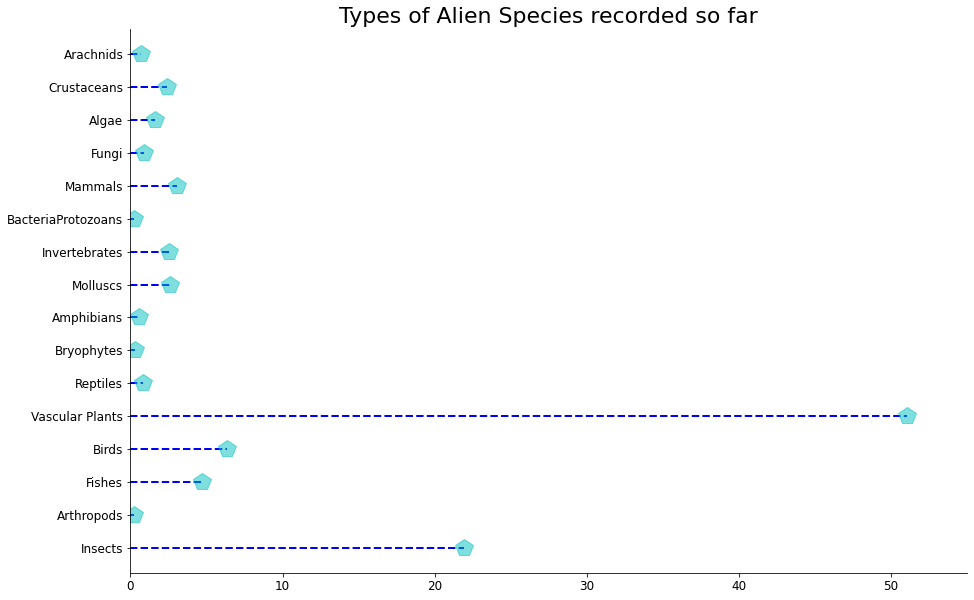

In [442]:
#Calculating percentage of totals for each type of species
pct_alien_types= (Types_Alien_spcs['Count']/Types_Alien_spcs['Count'].sum())*100
Types_Alien_spcs['pct_alien_types'] = pct_alien_types

#Create a vertical stem plot
fig, ax = plt.subplots(figsize=(15,10))

plt.hlines(y=Types_Alien_spcs['AlienType'], 
           xmin=0, xmax=Types_Alien_spcs['pct_alien_types'], 
           color='blue',
           linestyle='dashed', linewidth=2)

plt.plot(Types_Alien_spcs['pct_alien_types'],Types_Alien_spcs['AlienType'],"pc",alpha=0.5,markersize=18)

plt.title('Types of Alien Species recorded so far', fontsize=22)
plt.xlim(0,55)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
ax.tick_params()
sns.despine()
plt.show()

Inference: The above plot shows that vascular plants have been the most recorded alien species; followed by insects. 

### In the 20th century, what does the distribution of alien species look like?

GridDB supports SQL sub-queries too. In this case, I am using a sub-query to aggregate alien types by century.

In [464]:
#Construct the sub-query SQL to be used
sql = ("SELECT CASE when Year between 1500 and 1599 then 16 when Year between 1600 and 1699 then 17 when Year between 1700 and 1799 then 18 when Year between 1800 and 1899 then 19 when Year between 1900 and 1999 then 20 when Year between 2000 and 2099 then 21 end as Century, AlienType, SUM(Count) As Count FROM ("
"SELECT Year,'Vascular Plants' AS AlienType, SUM(CASE WHEN LENGTH(VascularPlants)=0 THEN 0 ELSE CAST(VascularPlants AS INTEGER) END) AS Count " 
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Bryophytes', SUM(CASE WHEN LENGTH(Bryophytes)=0 THEN 0 ELSE CAST(Bryophytes AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Algae', SUM(CASE WHEN LENGTH(Algae)=0 THEN 0 ELSE CAST(Algae AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Mammals', SUM(CASE WHEN LENGTH(Mammals)=0 THEN 0 ELSE CAST(Mammals AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Birds', SUM(CASE WHEN LENGTH(Birds)=0 THEN 0 ELSE CAST(Birds AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Reptiles', SUM(CASE WHEN LENGTH(Reptiles)=0 THEN 0 ELSE CAST(Reptiles AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Amphibians', SUM(CASE WHEN LENGTH(Amphibians)=0 THEN 0 ELSE CAST(Amphibians AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Fishes', SUM(CASE WHEN LENGTH(Fishes)=0 THEN 0 ELSE CAST(Fishes AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Insects', SUM(CASE WHEN LENGTH(Insects)=0 THEN 0 ELSE CAST(Insects AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Molluscs', SUM(CASE WHEN LENGTH(Molluscs)=0 THEN 0 ELSE CAST(Molluscs AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Crustaceans', SUM(CASE WHEN LENGTH(Crustaceans)=0 THEN 0 ELSE CAST(Crustaceans AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Arachnids', SUM(CASE WHEN LENGTH(Arachnids)=0 THEN 0 ELSE CAST(Arachnids AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Arthropods', SUM(CASE WHEN LENGTH(Arthropods)=0 THEN 0 ELSE CAST(Arthropods AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Invertebrates', SUM(CASE WHEN LENGTH(Invertebrates)=0 THEN 0 ELSE CAST(Invertebrates AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'Fungi', SUM(CASE WHEN LENGTH(Fungi)=0 THEN 0 ELSE CAST(Fungi AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 UNION SELECT Year,'BacteriaProtozoans', SUM(CASE WHEN LENGTH(BacteriaProtozoans)=0 THEN 0 ELSE CAST(BacteriaProtozoans AS INTEGER) END) "
" from Alien_Species_Analysis GROUP BY 1 "
") Table_A GROUP BY 1,2")

In [ ]:
#Construct the URL to be used to invoke the GridDB WebAPI to retrieve data
url = base_url + '/sql'

#Construct the request to be used during the GridDB WebAPI invocation 
request_body = '[{"type":"sql-select", "stmt":"'+sql+'"}]'

#Invoke the GridDB WebAPI
x = requests.post(url, data=request_body, headers=header_obj)

In [467]:
#Process the response received from the invocation of the GridDB WebAPI
myJson = x.json()

#Construct a Pandas dataframe with the data from the response
Alien_Dist_century = pd.DataFrame(myJson[0]["results"], columns=[myJson[0]["columns"][0]["name"], myJson[0]["columns"][1]["name"],myJson[0]["columns"][2]["name"]])


,Century,AlienType,Count
0,19,Insects,831
1,20,Reptiles,315
2,20,Bryophytes,124
3,18,Vascular Plants,636
4,18,Reptiles,0
...,...,...,...
91,18,Molluscs,10
92,20,Arachnids,220
93,16,Birds,24
94,21,Arthropods,22


<AxesSubplot:title={'center':'Distribution of Alien Species across centuries'}, xlabel='AlienType', ylabel='Count'>

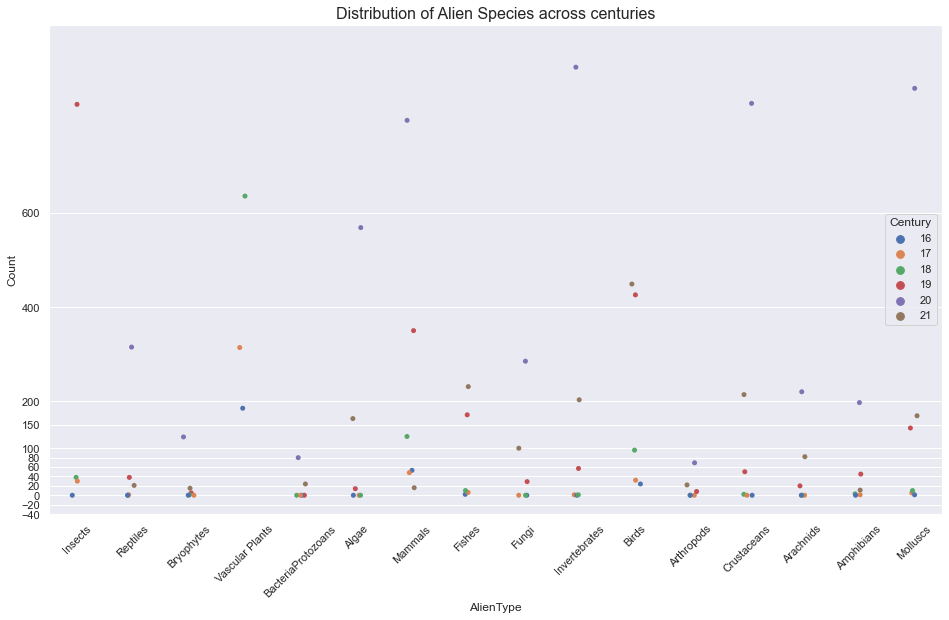

In [547]:
#Create a Strip Plot with the data
fig, ax = plt.subplots(figsize=(16,9))
sns.set(style='darkgrid')
plt.title("Distribution of Alien Species across centuries", fontsize=16)
plt.ylim(0,1000)
plt.xticks(rotation=45)
plt.yticks([-40,-20,0,20,40,60,80,100,150,200,400,600])
sns.stripplot(x='AlienType',y='Count',hue='Century',data=Alien_Dist_century)

Inference: Alien forms of Fungi seem to have been prevalent almost across all centuries. Insects were first recorded as early as the 16th century. Alien Vascular Plants have been recorded in the 16th and 17th centuries. Alien Arachnids, Amphibians, Reptiles have been recorded in the 20th and 21st centuries.

### Are there any anomalies in the distribution of alien species?

Let's reuse the data from the earlier GridDB WebAPI invocation.

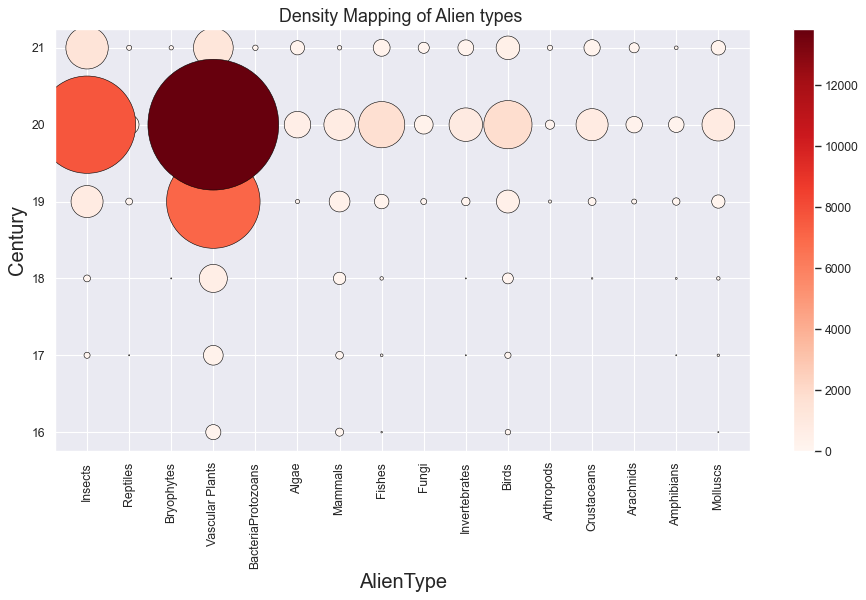

In [550]:
#Construct a scatter plot
fig = plt.figure(figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')    
plt.scatter('AlienType', 'Century', data=Alien_Dist_century, s='Count', c='Count', cmap='Reds', edgecolors='black', linewidths=.5)
plt.title("Density Mapping of Alien types ", fontsize=16)
plt.xlabel('AlienType', fontsize=18)
plt.ylabel('Century', fontsize=18)
plt.xticks(rotation=90)
plt.colorbar()
plt.show()

Inference: There are 3 major anomalies observed among Vascular Plants and Insects. There is an alarmingly high incidence of Vascular Plants in the 19th and 20th centuries. Insects too have had a high incidence as of the 20th century. 
Another interesting anomaly is that among alien species of Fishes and Mammals. While looking at the historic trend of fishes and mammals, fishes have always had a lower incidence than mammals. However, in the 20th century, the incidence of alien fishes has been way higher than that of mammals.

## Concluding Remarks

This article explained about GRIDDB's SQL capabilities and the power of GridDB's WebAPI and its ease of integration with custom python applications.